## <b>Introduction</b>
Perform EDA (Exploatory data analysis) of the cocktails dataset provided in the data folder.

<b>Steps:</b>

1. Import libraries and data
2. Preliminary inspection
3. Data visualization

In [1]:
from scripts.fetch_data import fetch_obesity_data
from scripts.linear_reg_script import linear_reg_plot
import seaborn as sns
import matplotlib.pyplot as plt
from scripts.reduce_dimensions import reduce_dimensions_pca
from scripts.heatmap import my_heatmap

## Load data

In [2]:
df = fetch_obesity_data()
df.sample(10).T

,1970,519,1321,1239,561,463,700,1943,860,944
Gender,Female,Female,Female,Female,Female,Male,Male,Female,Male,Male
Age,25.908829,18.535075,23.0,23.0,17.082867,17.0,17.758315,21.391371,20.0,26.288417
Height,1.607734,1.688025,1.608469,1.61082,1.640824,1.8,1.854162,1.730636,1.81748,1.767806
Weight,102.305767,45.0,82.954796,82.532994,43.365005,68.0,59.881316,131.902591,85.0,82.694689
family_history_with_overweight,yes,no,yes,yes,no,yes,yes,yes,yes,yes
FAVC,yes,yes,yes,yes,yes,no,yes,yes,yes,yes
FCVC,3.0,3.0,2.150054,2.09663,2.815157,2.0,2.966126,3.0,2.95118,1.947405
NCP,3.0,3.0,2.988539,2.879541,3.0,3.0,3.96981,3.0,3.0,3.118013
CAEC,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes
SMOKE,no,no,no,no,no,no,no,no,no,no


## Variable descriptions
1. FAVC - Do you eat high caloric food frequently?
2. FCVC - Do you usually eat vegetables in your meals?
3. NCP - How many main meals do you have daily?
4. CAEC - Do you eat any food between meals?
5. CH2O - How much water do you drink daily?	
6. SCC	- Do you monitor the calories you eat daily?
7. FAF - How often do you have physical activity?	
8. TUE - How much time do you use technological devices such as cell phone, videogames, television, computer and others?	
9. CALC - How often do you drink alcohol?
10. MTRANS - Which transportation do you usually use?
11. NObeyesdad - Obesity level

## Preliminary inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## Numeric data description

In [4]:
import pandas as pd

desc = df.describe().T

desc['5%'] = df.select_dtypes(include=['number']).quantile(0.05)
desc['95%'] = df.select_dtypes(include=['number']).quantile(0.95)
desc['missing'] = df.isnull().sum()

desc

,count,mean,std,min,25%,50%,75%,max,5%,95%,missing
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00,17.891428,38.098070,0
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98,1.548291,1.850000,0
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00,48.500000,131.916152,0
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00,1.523214,3.000000,0
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00,1.000000,3.750881,0
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00,1.000000,3.000000,0
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00,0.000000,2.677133,0
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00,0.000000,2.000000,0


## Categorical data description

In [5]:
cat_stats = pd.DataFrame({
    'unique_classes': df.select_dtypes(include=['object']).nunique(),
    'missing': df.select_dtypes(include=['object']).isnull().sum()
})

cat_proportions = {
    col: df[col].value_counts(normalize=True).to_dict()
    for col in df.select_dtypes(include=['object'])
}

cat_stats

,unique_classes,missing
Gender,2,0
family_history_with_overweight,2,0
FAVC,2,0
CAEC,4,0
SMOKE,2,0
SCC,2,0
CALC,4,0
MTRANS,5,0
NObeyesdad,7,0


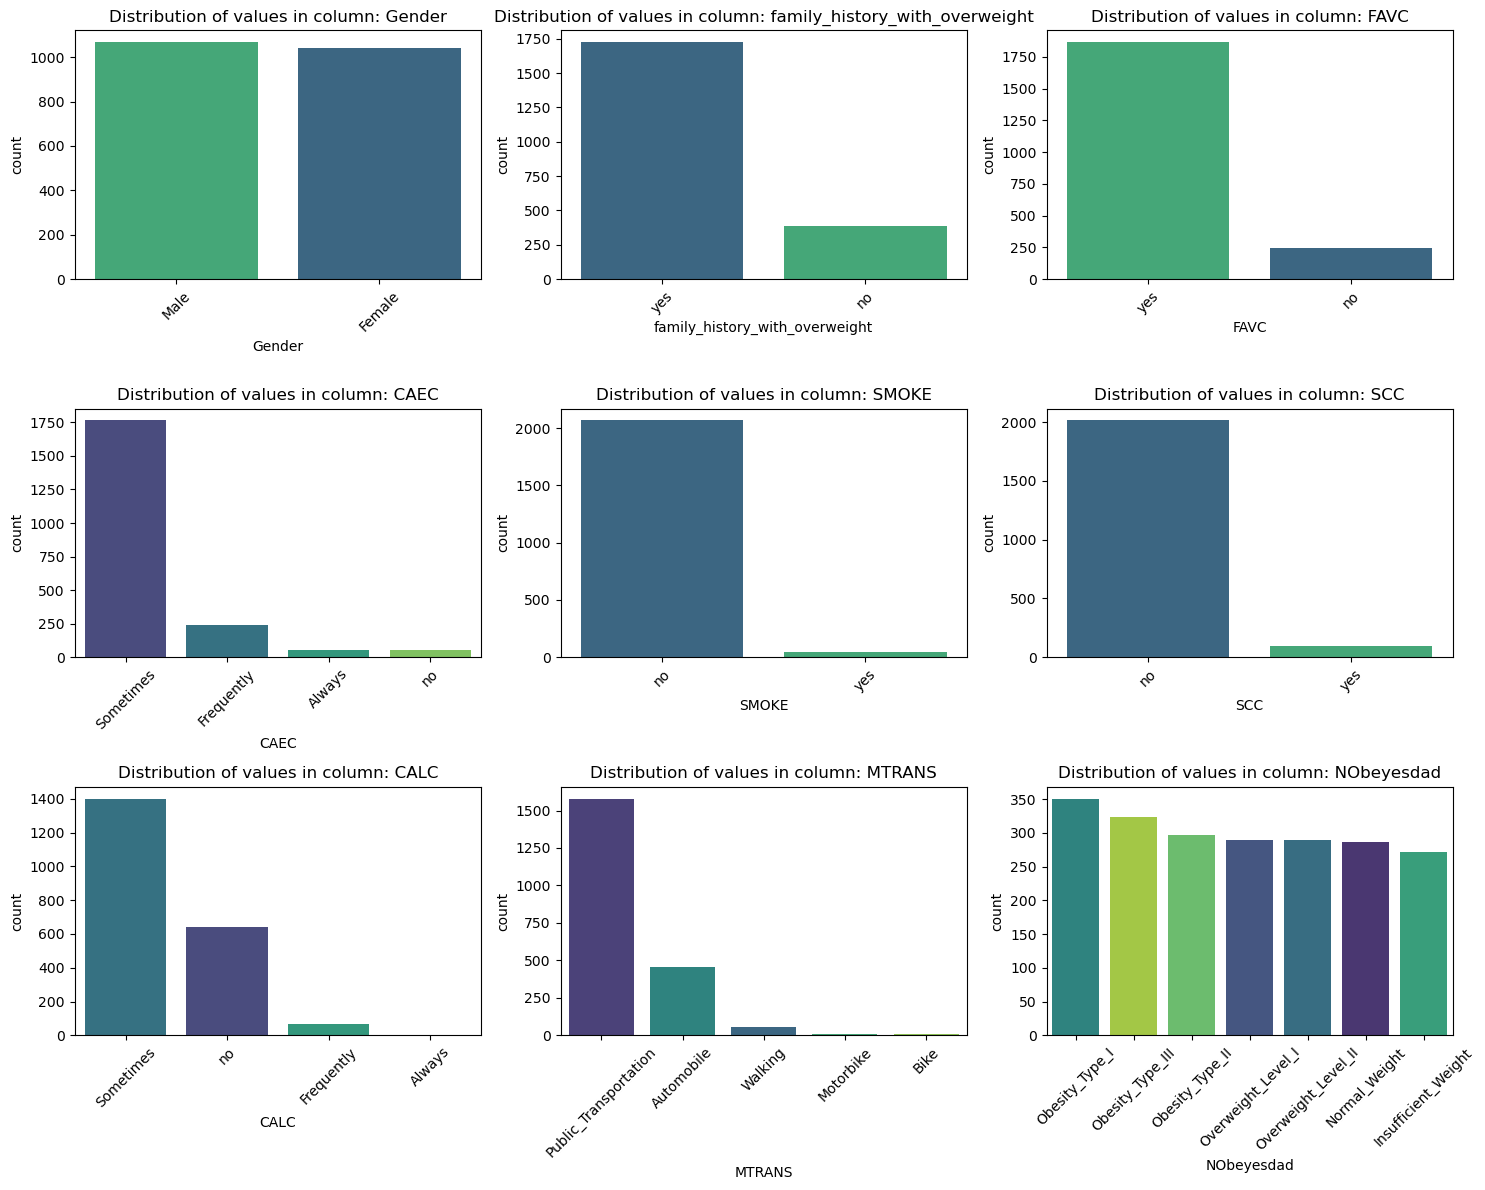

In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns 

plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue=col, palette="viridis", legend=False, order=df[col].value_counts().index)
    plt.title(f"Distribution of values in column: {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Target and gender are balanced, but other categorical data are not.

## Data visualisation

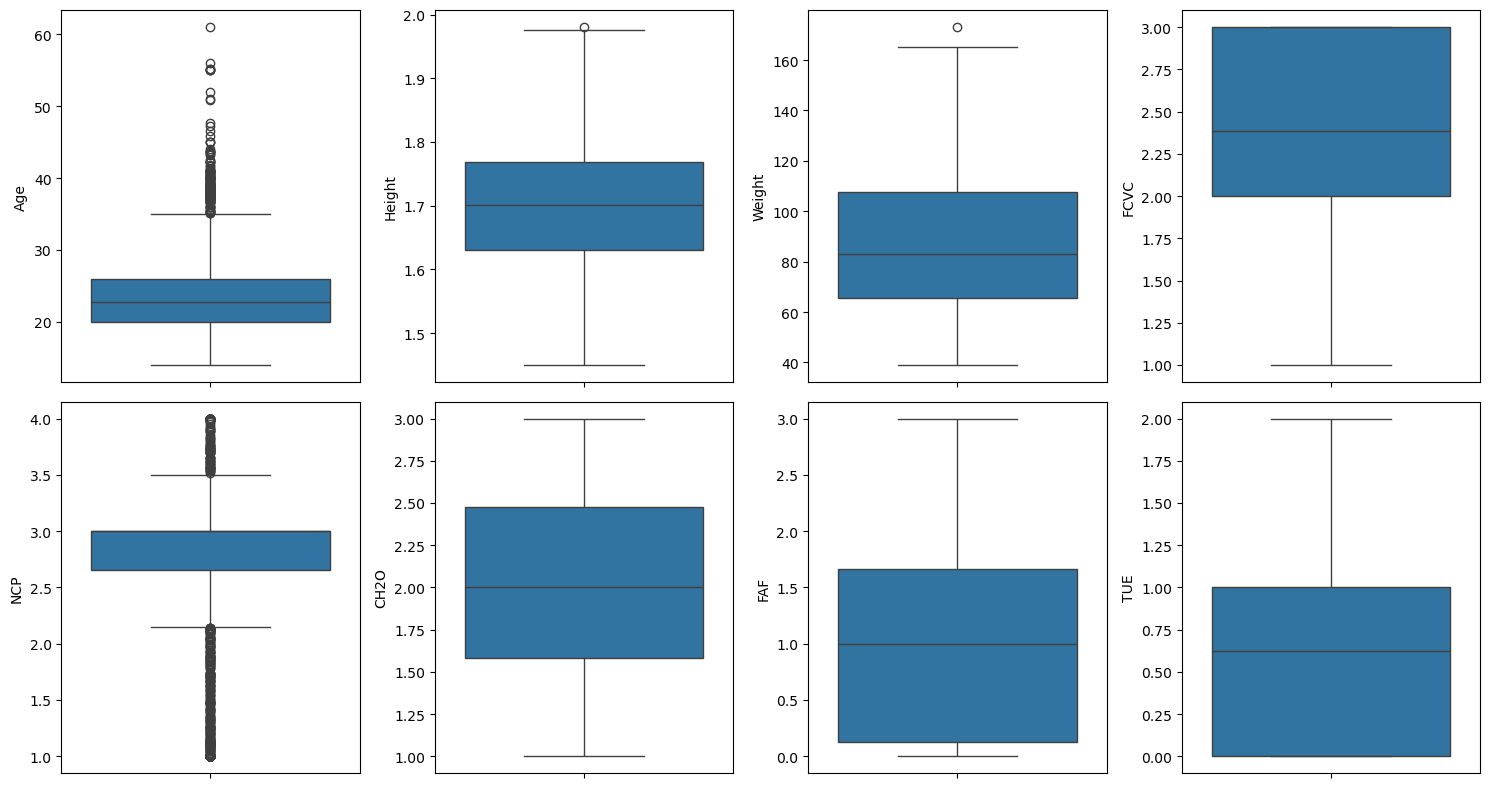

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()  

float_columns = df.select_dtypes(include=['float64']).columns 

for i, y in enumerate(float_columns):
    sns.boxplot(data=df, y=y, ax=axes[i])  

plt.tight_layout()  
plt.show()

1. Several variables show significant outliers, especially Age, and NCP, where multiple points lie beyond the upper whiskers.


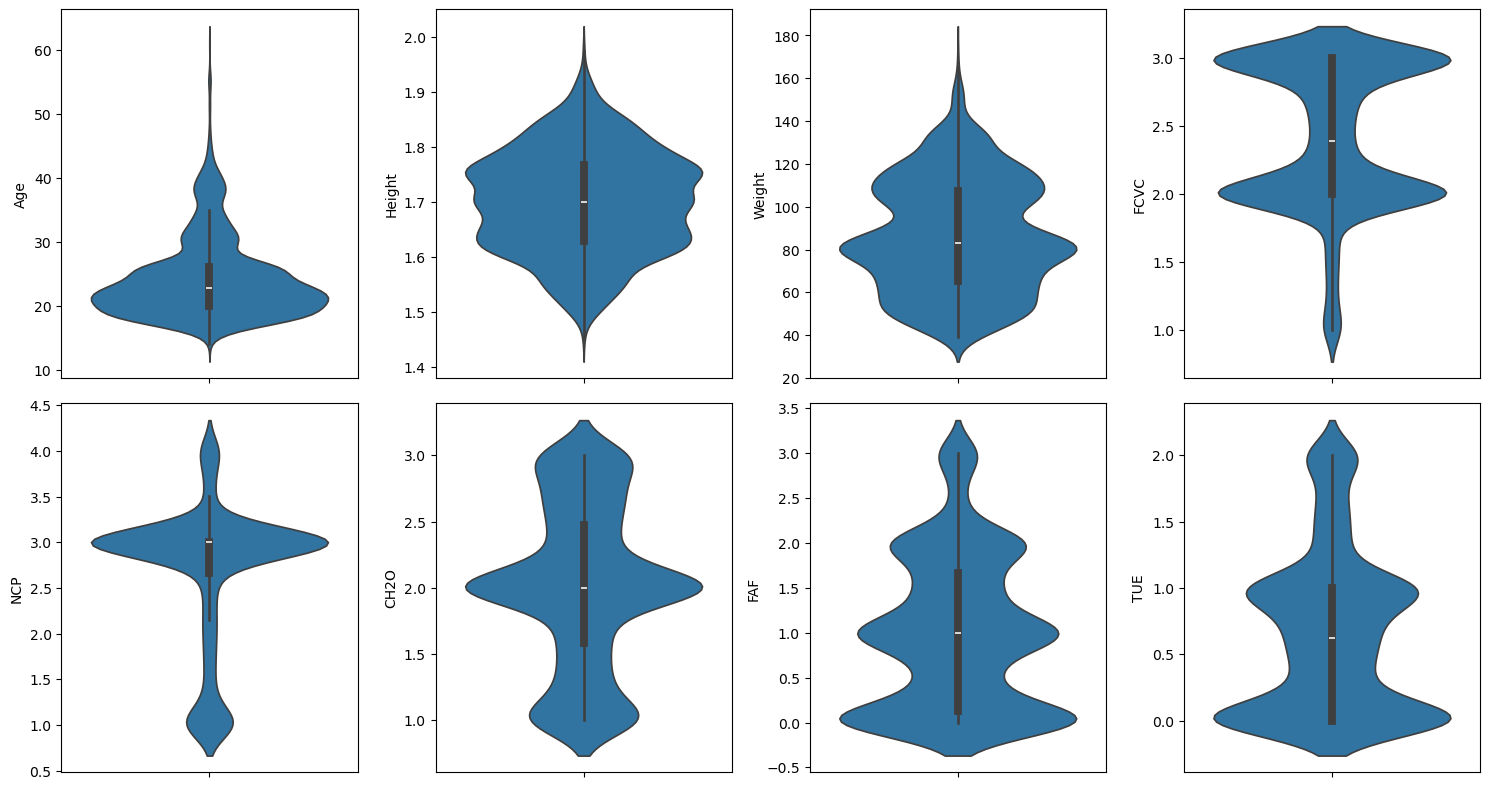

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()  

for i, var in enumerate(float_columns):
    sns.violinplot(data=df, y=var, ax=axes[i])

plt.tight_layout()  
plt.show()


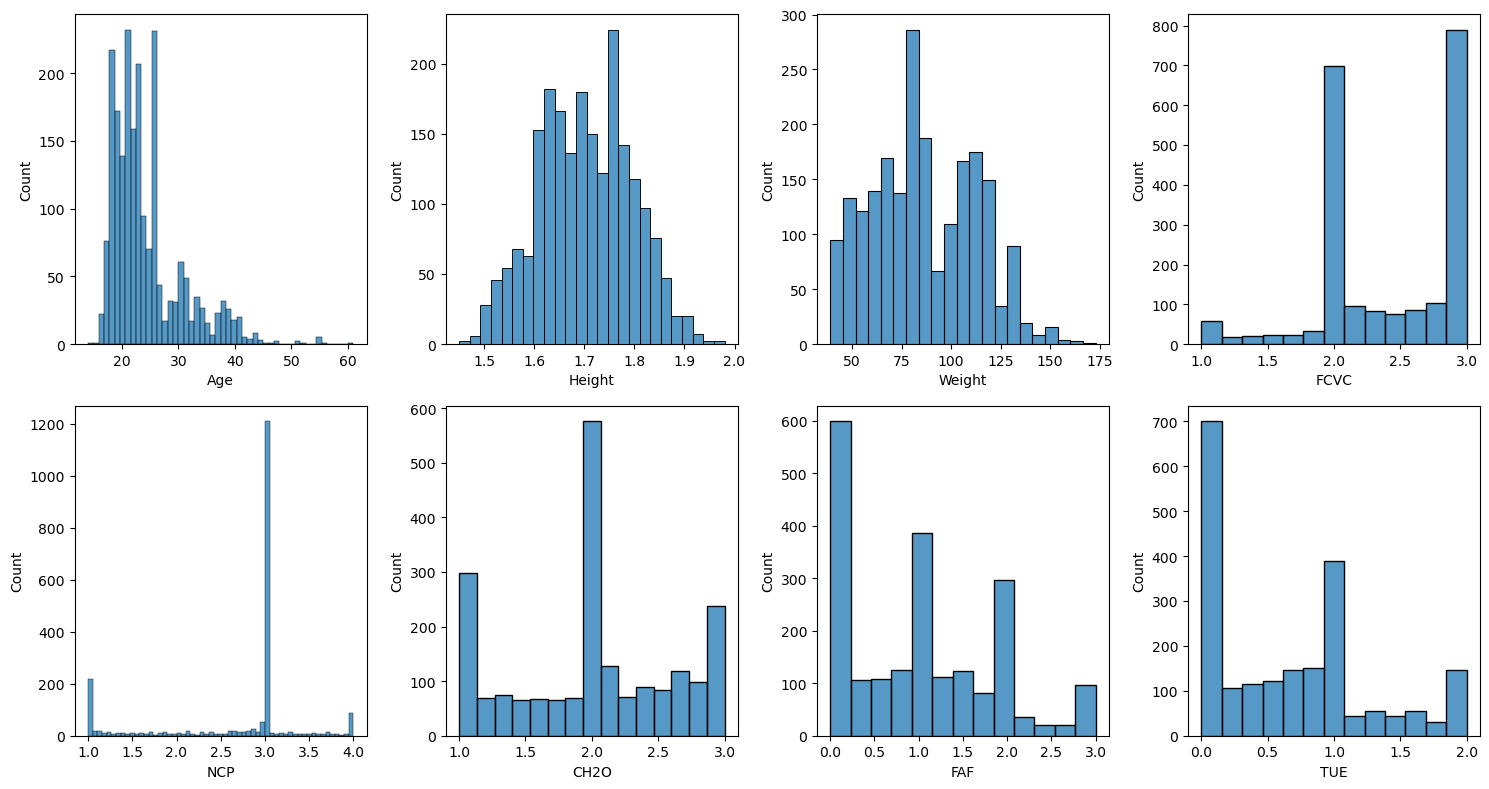

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i, var in enumerate(float_columns):
    sns.histplot(data=df, x=var, ax=axes[i])

plt.tight_layout()
plt.show()

1. Most inviduals are young
2. Most people eat 3 meals a day

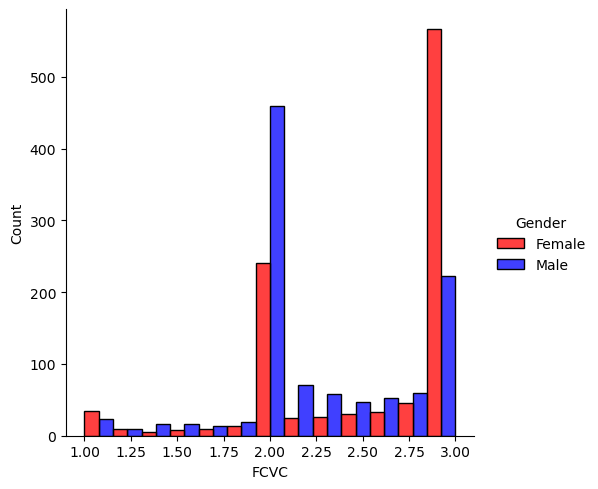

In [10]:
custom_palette = {"Male": "blue", "Female": "red"}
sns.displot(df, x="FCVC", hue="Gender", multiple="dodge", palette=custom_palette)

1. Females are eating more high caloric food.

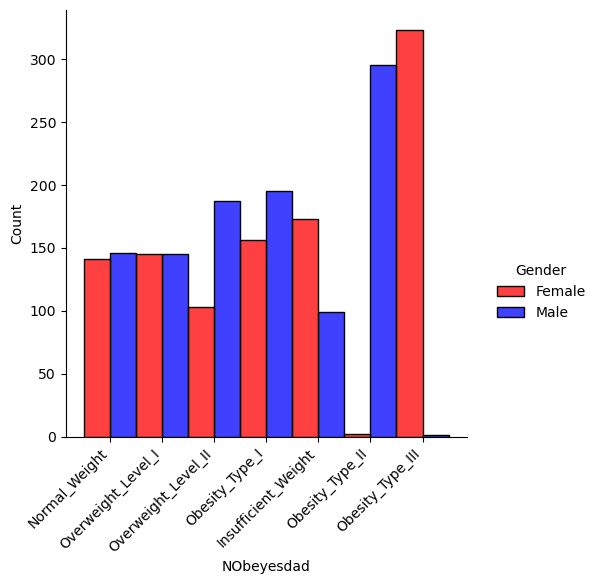

In [11]:
plot = sns.displot(df, x="NObeyesdad", hue="Gender", multiple="dodge", palette=custom_palette)

plt.xticks(rotation=45, ha='right')

plt.show()

A lot of females has obecity type 3 and almost no Males. The excact situation in in type 2 but in an oposite way.

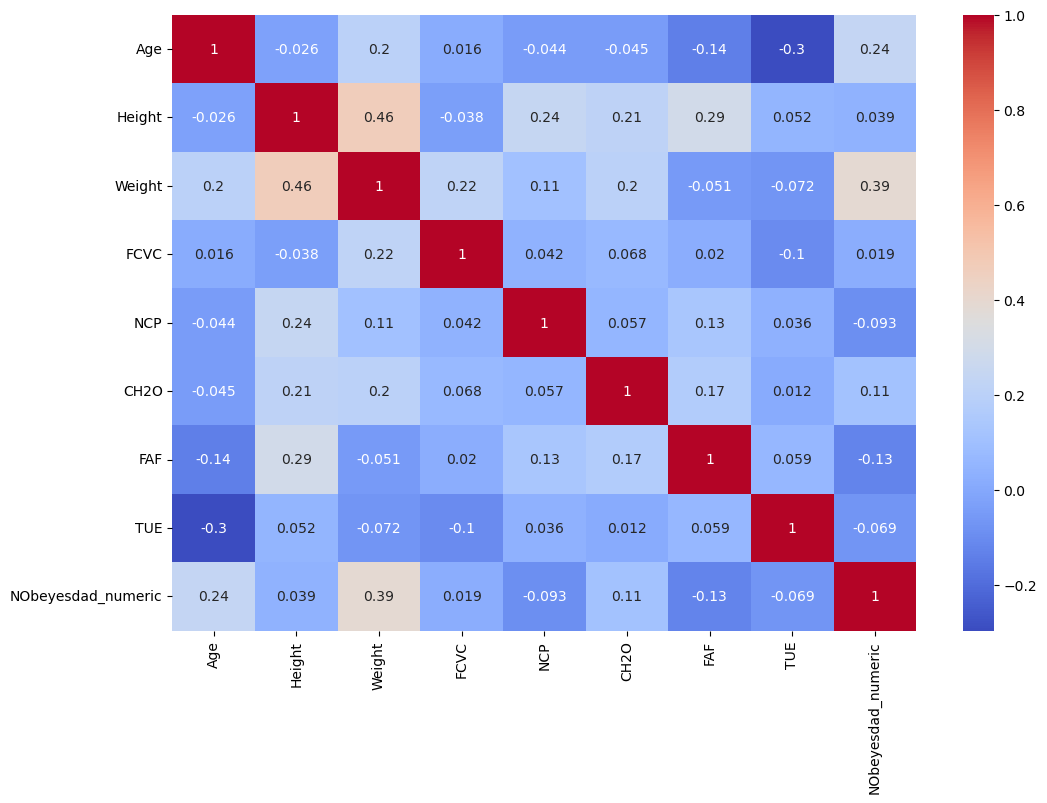

In [12]:
my_heatmap(df)

1. The strongest positive correlations appear to be:
    -Height and Weight (0.46)
    -Height and FAF (0.29)

2. The strongest negative correlations are:
    -Age and TUE (-0.3)
    -Age and FAF (-0.14)

3. Most correlations are relatively weak (below 0.3), suggesting limited linear relationships between most of these variables.
4. Age shows negative correlations with most other variables, particularly with TUE.
5. Height shows positive correlations with most other variables.

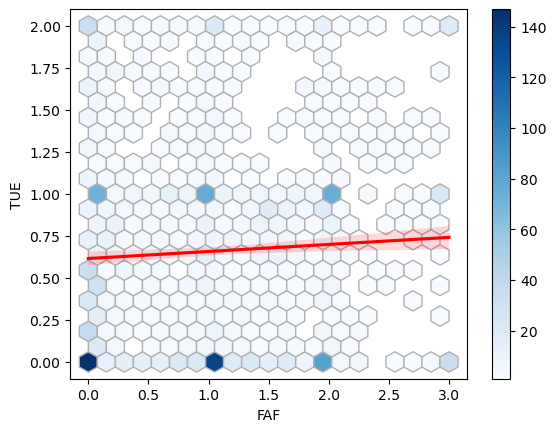

In [13]:
linear_reg_plot(df, 'FAF', 'TUE')

1. The slight upward slope of the regression line confirms the weak positive relationship - as Physical Activity Frequency increases, time of technological devices tends to increase very slightly.

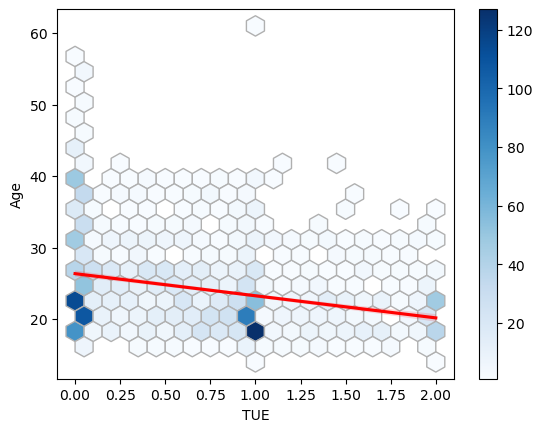

In [14]:
linear_reg_plot(df, 'TUE', 'Age')

1. The slight downward slope of the regression line confirms the weak negative relationship - as time of technological devices usage increases, age increase very slightly.

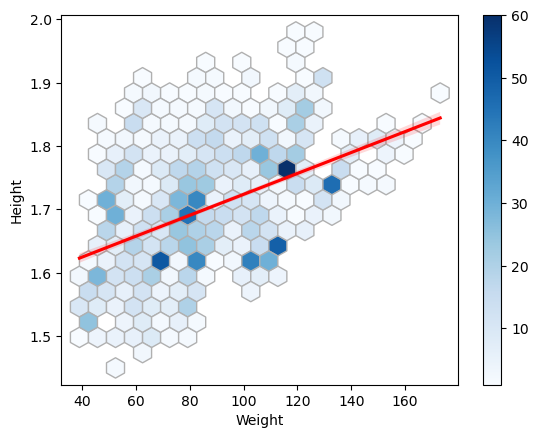

In [15]:
linear_reg_plot(df, 'Weight', 'Height')

1. The red line represents a linear regression or line of best fit, showing a positive correlation between weight and height. As weight increases, height tends to increase as well, which aligns with the correlation coefficient of 0.46 seen in your previous correlation matrix.
2. The plot confirms the positive correlation between height and weight shown in your previous correlation matrix, visualizing how these two variables relate across the entire dataset.
3. The weight range spans approximately from 40 to 170 kilograms, while the height range is approximately from 1.5 to 2.0 meters.
4. The hexagonal bins are colored according to data density - darker blue hexagons indicate areas with more data points, while lighter colored or white hexagons represent areas with fewer points.

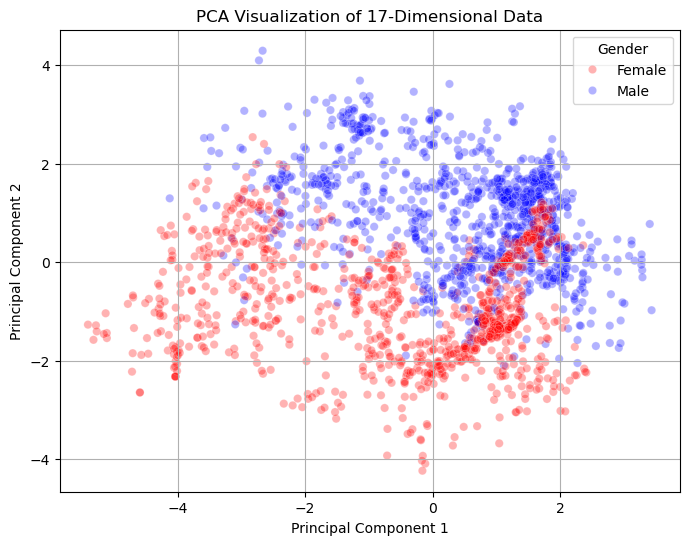

In [16]:
reduce_dimensions_pca(df, custom_palette)

1. The two genders exhibit some degree of separation in the 2D PCA space.
2. Female data points (red) are more concentrated in the upper-left region.
3. Male data points (blue) are more concentrated in the lower-right region.
4. There a significant overlap in the middle.
5. The data points are widely dispersed along both principal components, indicating that these two components capture a significant variance of the original 17-dimensional data.